In [12]:
from eins.program import Program
import networkx as nx
import matplotlib.pyplot as plt
import rho_plus as rp
# !pip install --editable .

theme, cs = rp.mpl_setup(True)

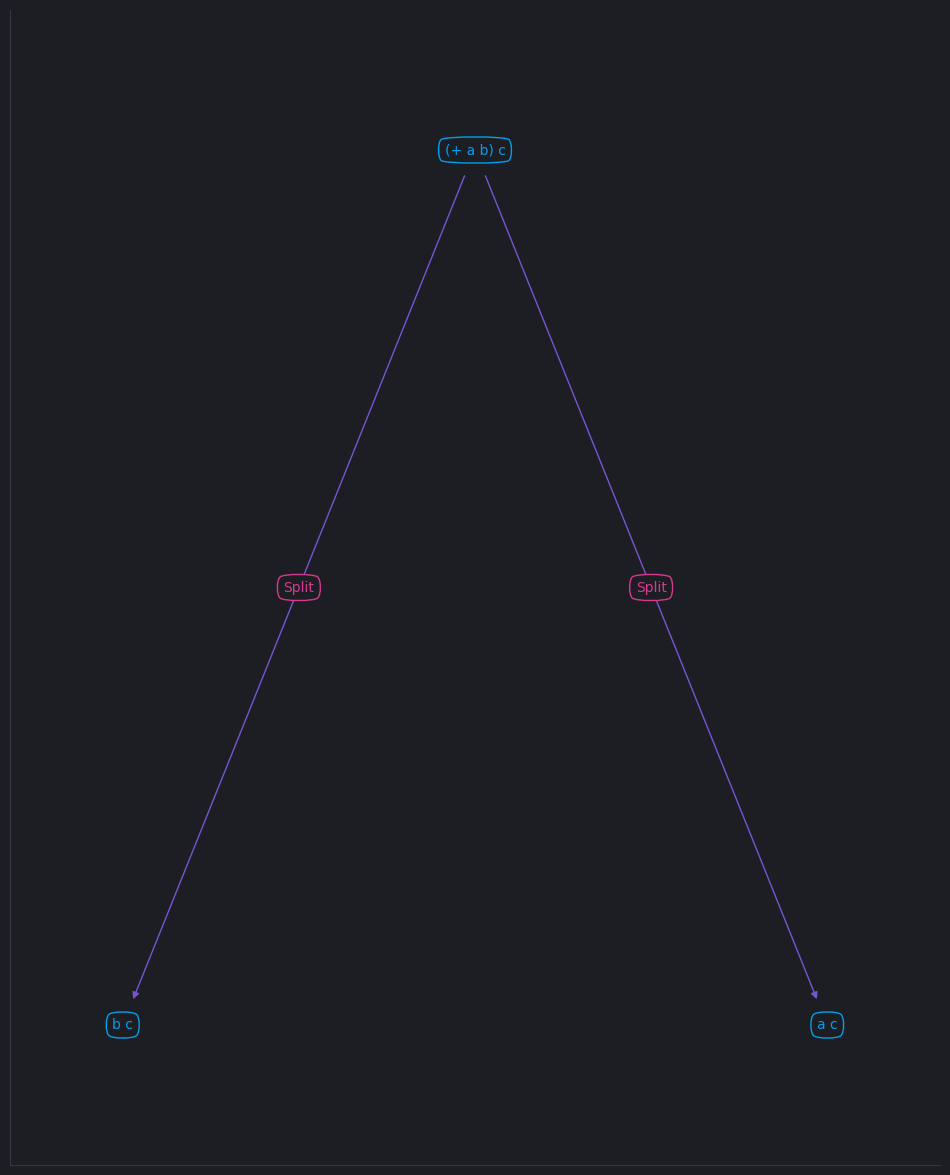

In [20]:
# prog = Program.parse('b ((n p) (n p)) c d=c, b p*p*d*c h, h g k, i (h k) -> b (n^2 g+i) k')
# prog = Program.parse('b (I p) (I p) c, (p p c) emb -> b (I I) emb')
# prog = Program.parse('a b, c b, b d -> a+c d')
prog = Program.parse('a+b c -> a c')
from eins.strategy import BaseStrategy


# prog = Program.parse('a b c, a+e c -> a b c')
# prog = Program.parse('b n1 d, b n2 d -> b n1 n2')

prog.make_path(BaseStrategy(prog))

G = nx.DiGraph()

def add_to_graph(node, layer=0):
    if id(node) not in G.nodes:
        G.add_node(id(node), label=str(node), layer=-layer)
    for (op, children) in node.children:
        for child in children:
            assert node in child.parents
            add_to_graph(child, layer=layer+1)
            # print(f'{node} -> {child} {op}')
            G.add_edge(id(node), id(child), label=op.__class__.__name__)

for source in prog.sources:
    add_to_graph(source)

# for sink in prog.sinks:
#     add_to_graph(sink)

fig, ax = plt.subplots(figsize=(12, 15))
labels = {node: data['label'] for node, data in G.nodes(data=True)}
edge_labels = {(e1, e2): data['label'] for e1, e2, data in G.edges(data=True)}
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')
# pos = nx.planar_layout(G)
nx.draw_networkx(G, pos=pos, ax=ax, node_shape='s', node_size=0, edge_color=cs[5], font_color=cs[0], margins=0.1,
                 min_source_margin=20, min_target_margin=20, labels=labels, font_size=10,
                 bbox=dict(boxstyle='round4', fc=plt.rcParams['axes.facecolor'], ec=cs[0], pad=0.5))
nx.draw_networkx_edge_labels(G, pos=pos, ax=ax, edge_labels=edge_labels, rotate=False, font_size=10, font_color=cs[4], bbox=dict(boxstyle='round4', fc=plt.rcParams['axes.facecolor'], ec=cs[4], pad=0.5));

In [25]:
prog.sources[0].children

[(Split(axis_num=0), [a c, b c])]

In [15]:
strat = BaseStrategy(prog)
print(prog)

# out0 = strat.connect(prog.outputs, prog.outputs[0])

# out0.parents

Input 1:
a b
Input 2:
c b
--------------------------------------------------
Current 1:
a b
Current 2:
c b
--------------------------------------------------
Output 1:
a b
Output 2:
c b
--------------------------------------------------
Final Output:
(+ a c) b
--------------------------------------------------
Equations:
['a', 'b', 'c']
{}


In [16]:
out = strat.connect([prog.current[0]], prog.outputs[0])
out

a b

In [17]:
prog.current[0]

a b

In [18]:
prog.outputs

[a b, c b]

In [19]:
from eins.program import reverse_graph

out = reverse_graph(prog.orig_sink)

ValueError: 

In [ ]:
out.children

[]

In [ ]:
from eins.symbolic import Combine
from eins.combination import ArrayCombination
import numpy as np


x = np.array([])